In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


1)

In [ ]:
file_path = '/content/gdrive/My Drive/Notes/CSC311/A3/mnistTVT.pickle'
with open(file_path, 'rb') as f:
  Xtrain,Ttrain,Xval,Tval,Xtest,Ttest = pickle.load(f)

Xtrain = Xtrain.astype(np.float64)
Xval   = Xval.astype(np.float64)
Xtest  = Xtest.astype(np.float64)

1a)

In [ ]:
print('\n\nQuestion 1')
print('----------')

print('\nQuestion 1(a):')



Question 1
----------

Question 1(a):


In [ ]:
def display(x):
  x = np.reshape(x, (5,5,28,28))
  f, axarr = plt.subplots(5,5)
  for i in range(5):
    axarr[i,0].imshow(x[i,0], cmap='Greys', interpolation='nearest')
    axarr[i,0].axis('off')
    axarr[i,1].imshow(x[i,1], cmap='Greys', interpolation='nearest')
    axarr[i,1].axis('off')
    axarr[i,2].imshow(x[i,2], cmap='Greys', interpolation='nearest')
    axarr[i,2].axis('off')
    axarr[i,3].imshow(x[i,3], cmap='Greys', interpolation='nearest')
    axarr[i,3].axis('off')
    axarr[i,4].imshow(x[i,3], cmap='Greys', interpolation='nearest')
    axarr[i,4].axis('off')

In [ ]:
def make_pca(x, components):
  pca = PCA(n_components=components)
  pca.fit(x)
  reduced_set    = pca.transform(x)
  projected_data = pca.inverse_transform(reduced_set)
  display(projected_data[:25,:])

  return reduced_set, projected_data, pca

Text(0.5, 0.98, 'Question 1(a): MNIST test data projected onto 30 dimensions')

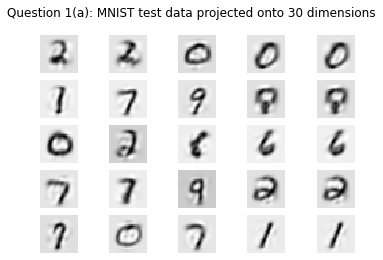

In [ ]:
make_pca(Xtrain, 30)
plt.suptitle("Question 1(a): MNIST test data projected onto 30 dimensions")

1b)

In [ ]:
print('\nQuestion 1(b):')

Text(0.5, 0.98, 'Question 1(b): MNIST test data projected onto 3 dimensions')

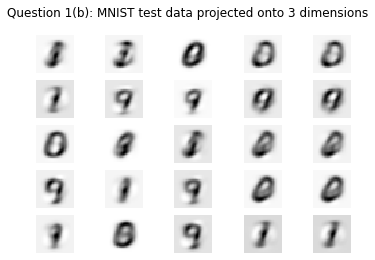

In [ ]:
make_pca(Xtrain, 3)
plt.suptitle("Question 1(b): MNIST test data projected onto 3 dimensions")

1c)

In [ ]:
print('\nQuestion 1(c):')

Text(0.5, 0.98, 'Question 1(c): MNIST test data projected onto 3 dimensions')

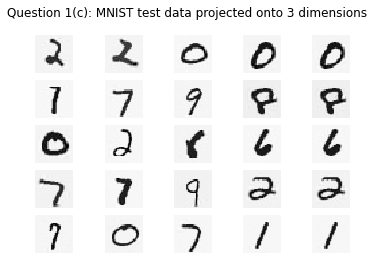

In [ ]:
make_pca(Xtrain, 300)
plt.suptitle("Question 1(c): MNIST test data projected onto 3 dimensions")

1d)

In [ ]:
print('\nQuestion 1(d):')

In [ ]:
def myPCA(X, K):
  mean = np.mean(X, axis=0)
  
  cov = np.cov((X-mean).T)

  eigh_values, eigh_vector = np.linalg.eig(cov)
  eigh_values = eigh_values[:K]
  #eigh_values = np.reshape(eigh_values, (eigh_values.shape[0], 1))
  eigh_values = np.diag(eigh_values)
  eigh_vector = eigh_vector[:K,:]

  A = eigh_vector
  z = np.matmul(X, A.T)

  Xp = mean + np.matmul(z, A)
  return Xp

Xp = myPCA(Xtrain[:5000,:], 30)

1f)

In [ ]:
print('\nQuestion 1(f):')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0.5, 0.98, 'Question 1(f): MNIST data projected onto 100 dimensions')

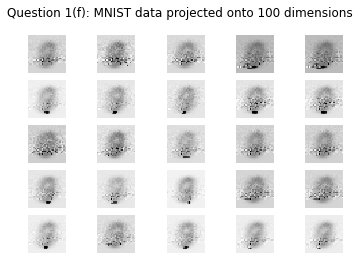

In [ ]:
myXtrainP = myPCA(Xtrain[:5000,:], 100)
display(myXtrainP[:25,:].astype(np.float64))
plt.suptitle("Question 1(f): MNIST data projected onto 100 dimensions")

Text(0.5, 0.98, 'Question 1(f): MNIST data projected onto 100 dimensions (sklearn)')

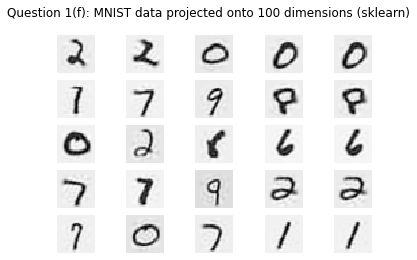

In [ ]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(Xtrain[:5000,:])
reduced_set    = pca.transform(Xtrain[:5000,:])
projected_data = pca.inverse_transform(reduced_set)
XtrainP        = projected_data
display(projected_data[:25,:])

plt.suptitle("Question 1(f): MNIST data projected onto 100 dimensions (sklearn)")

In [ ]:
X   = XtrainP - myXtrainP
RMS = np.mean(X ** 2)
RMS = np.sqrt(RMS)
print(RMS)

(0.24792500387102104-0.0001158612987344954j)


2)

In [ ]:
print('\n\nQuestion 2')
print('----------')

In [ ]:
SmXtrain = Xtrain[:200,:]
SmTtrain = Ttrain[:200]
DBXtrain = Xtrain[:300,:]
DBTtrain = Ttrain[:300]

2a)


In [ ]:
print('\nQuestion 2(a):')

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.utils.testing import ignore_warnings

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
clf = QDA()
clf.fit(SmXtrain, SmTtrain)
print(clf.score(SmXtrain, SmTtrain))
print(clf.score(Xtest, Ttest))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


1.0
0.1489


2b)

In [ ]:
print('\nQuestion 2(b):')

In [ ]:
def find_reg(Xtrain, Ttrain, Xval, Tval):
  train_accs = []
  val_accs   = []
  params     = []
  for n in range(21):
    param = 2**-n
    params.append(param)
    clf = QDA(reg_param=param)
    ignore_warnings(clf.fit)(Xtrain,Ttrain)
    train_accs.append(clf.score(Xtrain, Ttrain))
    val_accs.append(clf.score(Xval, Tval))

  print(max(val_accs))

  plt.semilogx(params, train_accs, 'b')
  plt.semilogx(params, val_accs, 'r')
  plt.xlabel("Regularization paramter")
  plt.ylabel("Accuracy")

0.2507


Text(0.5, 1.0, 'Question 2(b): Training and Validation Accuracy for Regularized QDA')

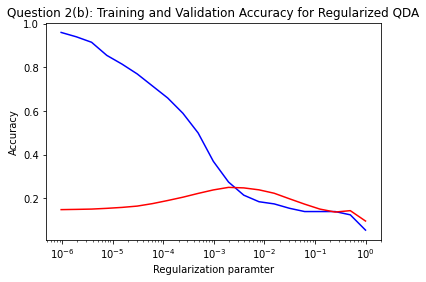

In [ ]:
find_reg(SmXtrain, SmTtrain, Xval, Tval)
plt.title("Question 2(b): Training and Validation Accuracy for Regularized QDA")

2c)

*** TO DO ***

2d)

In [ ]:
print('\nQuestion 2(d):')

In [ ]:
def train2d(K,X,T):
  pca = PCA(n_components=K, svd_solver='full')
  pca.fit(X)
  red_x = pca.transform(X)

  qda = QDA()
  ignore_warnings(qda.fit)(red_x, T)
  acc = qda.score(red_x, T)

  return pca, qda, acc

def test2d(pca, qda, X, T):
  red_x = pca.transform(X)
  acc = qda.score(red_x, T)
  return acc

0.6938


Text(0.5, 1.0, 'Question 2(d): Training and Validation Accuracy for PCA + QDA')

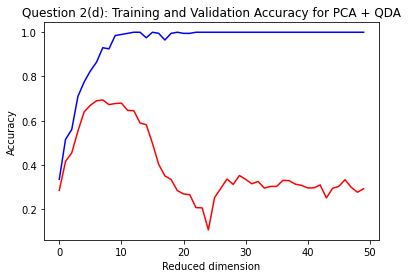

In [ ]:
train_accs = []
val_accs   = []
for k in range(1,51, 1):
  pca, qda, acc = train2d(k, SmXtrain, SmTtrain)
  train_accs.append(acc)
  val_accs.append(test2d(pca,qda,Xval, Tval))

print(max(val_accs))

plt.plot(train_accs, 'b')
plt.plot(val_accs, 'r')
plt.xlabel("Reduced dimension")
plt.ylabel("Accuracy")
plt.title("Question 2(d): Training and Validation Accuracy for PCA + QDA")

2e)

***TO DO***

2f)

In [ ]:
print('\nQuestion 2(f):')

In [ ]:
val_accs   = np.ones((50,21))
train_accs = np.ones((50,21))

accMax    = 0
accMax_k  = 0
accMax_rp = 0

for k in range(1,51,1):
  pca = PCA(n_components=k)
  pca.fit(SmXtrain)
  red_x_train = pca.transform(SmXtrain)
  red_x_val   = pca.transform(Xval)
  for rp in range(21):
    qda = QDA(reg_param=(2**-rp))
    ignore_warnings(qda.fit)(red_x_train, SmTtrain)

    train_acc = qda.score(red_x_train, SmTtrain)
    val_acc   = qda.score(red_x_val, Tval)
    
    val_accs[k-1, rp]   = val_acc
    train_accs[k-1, rp] = train_acc

    if val_acc > accMax:
      accMax    = val_acc
      accMax_k  = k
      accMax_rp = rp

print(accMax)
print(train_accs[accMax_k, accMax_rp])
print(accMax_rp)
print(accMax_k)

0.8497
0.99
2
18


Text(0.5, 1.0, 'Question 2(f): Maximum validation accuracy for QDA')

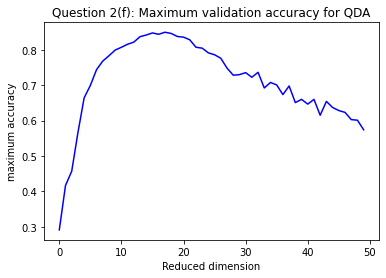

In [ ]:
accMaxK = np.amax(val_accs, axis=1)

plt.plot(accMaxK, 'b')
plt.xlabel("Reduced dimension")
plt.ylabel("maximum accuracy")
plt.title("Question 2(f): Maximum validation accuracy for QDA")

3)

3a)

In [ ]:
print('\n\nQuestion 3')
print('----------')
print('\nQuestion 3(a):')

In [ ]:
def myBootstrap(X,T):
  while True:
    bs_x, bs_t = sk.utils.resample(X, T, n_samples=T.size)
    if min(np.unique(bs_t, return_counts=True)[1]) > 3:
      return bs_x, bs_t

3b)

In [ ]:
print('\nQuestion 3(b):')

In [ ]:
qda0 = QDA(reg_param=0.004)
ignore_warnings(qda0.fit)(SmXtrain, SmTtrain)
val_acc0 = qda0.score(Xval, Tval)
print(val_acc0)

0.2474


In [ ]:
def bs_qda(Xtrain, Ttrain, Xval, Tval, iters, rp=0.004):
  prob_matrix = np.zeros((Tval.shape[0], 10))

  for i in range(iters):
    x, t = myBootstrap(Xtrain, Ttrain)
    qda  = QDA(reg_param=rp)
    ignore_warnings(qda.fit)(x, t)
    prob_matrix = prob_matrix + qda.predict_proba(Xval)

  prob_matrix = prob_matrix / iters
  pred        = np.argmax(prob_matrix, axis=1)
  acc         = np.mean(pred == Tval)

  return acc

In [ ]:
acc = bs_qda(SmXtrain, SmTtrain, Xval, Tval, 50)
print(acc)

0.5563


3c)

In [ ]:
print('\nQuestion 3(c):')

In [ ]:
accs = []
prob_matrix = np.zeros((Tval.shape[0], 10))

for i in range(500):
  x, t = myBootstrap(SmXtrain, SmTtrain)
  qda  = QDA(reg_param=0.004)
  ignore_warnings(qda.fit)(x, t)

  prob_matrix      = prob_matrix + qda.predict_proba(Xval)
  temp_prob_matrix = prob_matrix / (i+1)
  pred             = np.argmax(temp_prob_matrix, axis=1)
  
  accs.append(np.mean(pred == Tval))

Text(0.5, 1.0, 'Question 3(c): Validation accuracy')

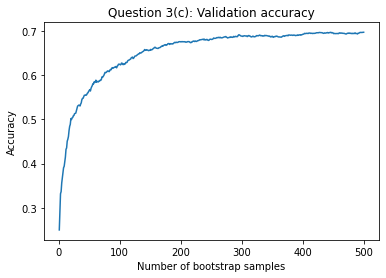

In [ ]:
plt.plot(range(1,501,1), accs)
plt.xlabel("Number of bootstrap samples")
plt.ylabel("Accuracy")
plt.title("Question 3(c): Validation accuracy")

Text(0.5, 1.0, 'Question 3(c): Validation accuracy (log scale)')

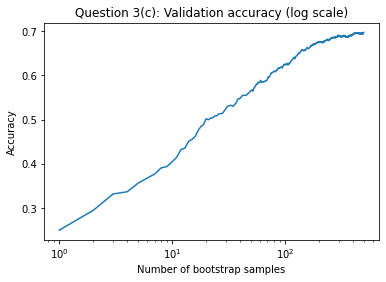

In [ ]:
plt.plot(range(1,501,1), accs)
plt.xlabel("Number of bootstrap samples")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.title("Question 3(c): Validation accuracy (log scale)")

3d)

In [ ]:
print('\nQuestion 3(d):')

In [ ]:
def train3d(K, R, X, T):
  pca = PCA(n_components=K)
  pca.fit(X)
  red_x = pca.transform(X)

  qda = QDA(reg_param=R)
  ignore_warnings(qda.fit)(red_x, T)

  return pca, qda

In [ ]:
def proba3d(pca, qda, X):
  x = pca.transform(X)
  return qda.predict_proba(x)

3e)

In [ ]:
print('\nQuestion 3(e):')

In [ ]:
def myBag(K, R):
  global SmXtrain
  global SmTtrain
  global Xval
  global Tval 

  pca, qda = train3d(K, R, SmXtrain, SmTtrain)
  acc0 = qda.score(pca.transform(Xval), Tval)

  prob_matrix = np.zeros((Tval.size, 10))

  for i in range(200):
    x, t        = myBootstrap(SmXtrain, SmTtrain)
    pca, qda    = train3d(K, R, x, t)
    prob_matrix = prob_matrix + proba3d(pca, qda, Xval)

  pred = np.argmax(prob_matrix/200, axis=1)
  acc  = np.mean(pred == Tval)

  return acc0, acc

3f)

In [ ]:
print('\nQuestion 3(f):')

In [ ]:
acc0, acc = myBag(100, 0.01)
print(acc0)
print(acc)

0.3718
0.8368


3g)

In [ ]:
print('\nQuestion 3(g):')

In [ ]:
acc0s = []
accs  = []

for i in range(50):
  K = np.random.randint(1, 11)
  R = np.random.uniform(0.2, 1.0)

  acc0, acc = myBag(K, R)

  acc0s.append(acc0)
  accs.append(acc)

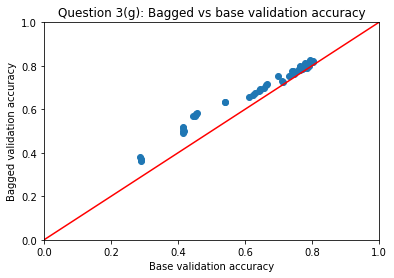

In [ ]:
plt.scatter(acc0s, accs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Base validation accuracy")
plt.ylabel("Bagged validation accuracy")
plt.title("Question 3(g): Bagged vs base validation accuracy")
plt.plot([0,1], [0,1], 'r')

3h)

In [ ]:
print('\nQuestion 3(h):')

In [ ]:
acc0s = []
accs  = []

for i in range(50):
  K = np.random.randint(50, 201)
  R = np.random.uniform(0, 0.05)

  acc0, acc = myBag(K, R)

  acc0s.append(acc0)
  accs.append(acc)

0.5071


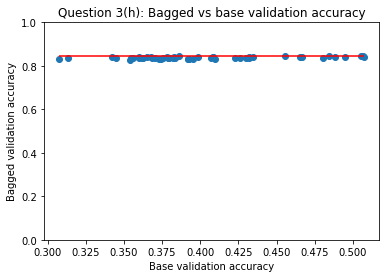

In [ ]:
print(max(acc0s))
plt.scatter(acc0s, accs)
plt.ylim(0,1)
plt.xlabel("Base validation accuracy")
plt.ylabel("Bagged validation accuracy")
plt.title("Question 3(h): Bagged vs base validation accuracy")
plt.hlines(max(accs), min(acc0s), max(acc0s), 'r')

3i)

***TO DO***

4a)

In [ ]:
print('\n\nQuestion 4')
print('----------')
print('\nQuestion 4(a):')

In [ ]:
file_path = '/content/gdrive/My Drive/Notes/CSC311/A3/dataA2Q2.pickle'
with open(file_path, 'rb') as file:
  dataTrain, dataTest = pickle.load(file)
Xtrain,Ttrain = dataTrain
Xtest, Ttest  = dataTest

In [ ]:
def plot_clusters(X, R, Mu):
  sumR = np.sum(R, axis=0)
  sortedR = R[:, np.argsort(sumR)]

  plt.scatter(X[:,0], X[:,1], color=sortedR, s=5)
  plt.scatter(Mu[:,0], Mu[:,1], c='black', s=5)

4b)

In [ ]:
print('\nQuestion 4(b):')

In [ ]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Question 4(b): K means')

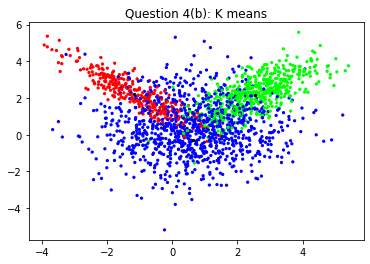

In [ ]:
clf4b = KMeans(n_clusters=3)
clf4b.fit(Xtrain)
Rtrain = np.zeros((Ttrain.size, Ttrain.max()+1))
Rtrain[np.arange(Ttrain.size), Ttrain] = 1

plot_clusters(Xtrain, Rtrain, clf4b.cluster_centers_)
plt.title("Question 4(b): K means")

In [ ]:
print(clf4b.score(Xtrain))
print(clf4b.score(Xtest))

-3536.424192018345
-3732.2514702478575


4c)

In [ ]:
print('\nQuestion 4(c):')

In [ ]:
from sklearn.mixture import GaussianMixture as GM

Text(0.5, 1.0, 'Question 4(c): Gaussian mixture model (spherical)')

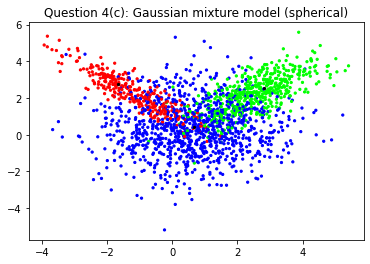

In [ ]:
clf4c = GM(n_components=3, covariance_type='spherical')
clf4c.fit(Xtrain)

plot_clusters(Xtrain, Rtrain, clf4c.means_)
plt.title("Question 4(c): Gaussian mixture model (spherical)")

In [ ]:
print(clf4c.score(Xtrain))
print(clf4c.score(Xtest))

-3.6947424147740775
-3.761070767846039


4d)

In [ ]:
print('\nQuestion 4(d):')

Text(0.5, 1.0, 'Question 4(d): Guassian mixture model (full)')

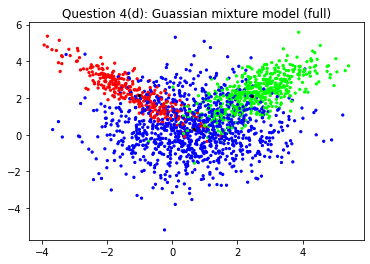

In [ ]:
clf4d = GM(n_components=3, covariance_type='full')
clf4d.fit(Xtrain)

plot_clusters(Xtrain, Rtrain, clf4d.means_)
plt.title("Question 4(d): Guassian mixture model (full)")

In [ ]:
print(clf4d.score(Xtrain))
print(clf4d.score(Xtest))
print("Q4d-Q4c test scores = {0}".format(clf4d.score(Xtest) - clf4c.score(Xtest)))

-3.5946495029931294
-3.729288877775982
Q4d-Q4c test scores = 0.03178189007005683


4e)

In [ ]:
print('\nQuestion 4(e):')

In [ ]:

def genR(X, Mu):
  N = X.shape[0]
  M = X.shape[1]
  K = Mu.shape[0]

  R  = np.reshape(X, [N, 1, M]) - np.reshape(Mu, [1, K, M])
  R  = R**2
  D  = np.sum(R)
  R  = np.sum(R, axis=2)
  R  = np.sqrt(R)
  R0 = np.argmin(R, axis=1)
  R  = np.zeros((N, K))
  R[np.arange(R0.size), R0] = 1

  return R, D/10

def myKmeans(X, K, I):
  '''
  shuffles data, takes first k points of shuffled data,
  thus providing us with k random values for our centers
  '''
  Mu = np.array(X, copy=True)
  np.random.shuffle(Mu)
  Mu = Mu[:K]

  scores = []

  for i in range(I):
    R, D  = genR(X, Mu)
    R0    = np.argmax(R, axis=1)
    scores.append(D)

    for k in range(K):
      points  = X[R0==k]
      meank   = np.mean(points, axis=0)
      Mu[k,:] = meank

  return Mu, R, scores

In [ ]:
Mu, R, scores = myKmeans(Xtrain, 3, 100)

Text(0.5, 1.0, 'Question 4(e): score vs iteration (Kmeans)')

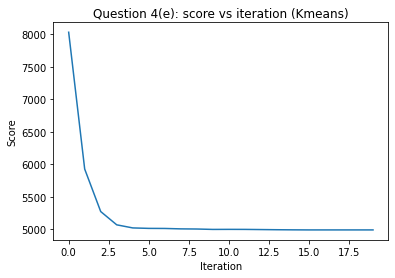

In [ ]:
plt.plot(scores[:20])
plt.ylabel("Score")
plt.xlabel("Iteration")
plt.title("Question 4(e): score vs iteration (Kmeans)")

Text(0.5, 1.0, 'Queston 4(e): Data clustered by K means')

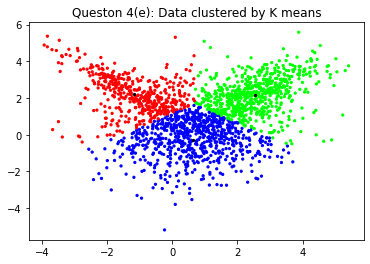

In [ ]:
plot_clusters(Xtrain, R, Mu)
plt.title("Queston 4(e): Data clustered by K means")

In [ ]:
def scoreKmeans(X, Mu):
  N = X.shape[0]
  M = X.shape[1]
  K = Mu.shape[0]

  R  = np.reshape(X, [N, 1, M]) - np.reshape(Mu, [1, K, M])
  R  = R**2
  return np.sum(R)/10

In [ ]:
print(scoreKmeans(Xtrain, Mu))
print(scoreKmeans(Xtest, Mu))
print("Q4e+Q4b test scores = {0}".format(scoreKmeans(Xtest, Mu) + clf4b.score(Xtest)))

4989.612680849169
4993.6437807668235
Q4e+Q4b tst scores = 1261.392310518966


4f)

In [ ]:
print('\nQuestion 4(f):')

In [ ]:
def euc_dist(x, y):
  N = x.shape[0]
  M = x.shape[1]
  K = y.shape[0]

  z = np.reshape(x, (N, 1, M)) - np.reshape(y, (1, K, M))
  z = z**2
  z = np.sum(z, axis=2)
  z = np.sqrt(z)
  return z

In [ ]:
def genRGMM(X, Mu, pi):
  num = pi * np.exp(-0.5 * euc_dist(X, Mu)**2)
  den = np.sum(num, axis=0)
  return num/den

def logp(X, Mu, pi):
  z = pi * np.exp(-0.5 * euc_dist(X, Mu))
  z = np.sum(z, axis=1)
  z = np.log(z)
  return np.sum(z)

def scoreGMM(X, Mu, Pi):
  N = X.shape[0]
  return logp(X,Mu,Pi)/N

def myGMM(X,K,I):
  '''
  shuffles data, takes first k points of shuffled data,
  thus providing us with k random values for our centers
  '''
  N  = X.shape[0]
  Mu = np.array(X, copy=True)
  np.random.shuffle(Mu)
  Mu     = Mu[:K]
  var    = np.identity(K)
  R, sp  = genR(X, Mu)
  Nk     = np.sum(R, axis=0)
  pi     = Nk / N
  scores = []

  for i in range(I):
    R  = genRGMM(X, Mu, pi)
    Nk = np.sum(R, axis=0)
    Mu = (np.matmul(X.T, R) / Nk).T
    pi = Nk / N
    scores.append(scoreGMM(X, Mu, pi))

  #R, sp = genR(X, Mu)
  return Mu, pi, R, scores

In [ ]:
Mu, pi, R, scores = myGMM(Xtrain, 3, 100)

Text(0.5, 1.0, 'Question 4(f): score vs iteration (GMM)')

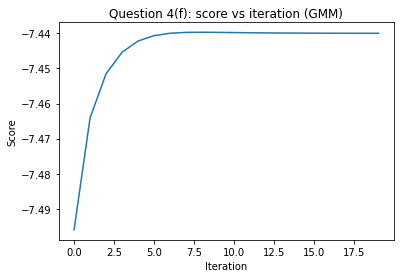

In [ ]:
plt.plot(scores[:20])
plt.ylabel("Score")
plt.xlabel("Iteration")
plt.title("Question 4(f): score vs iteration (GMM)")

Text(0.5, 1.0, 'Queston 4(f): Data clustered by GMM')

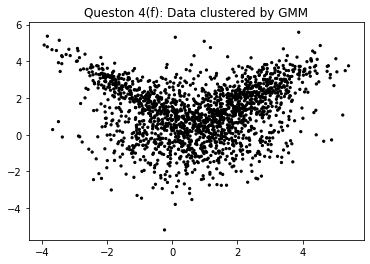

In [ ]:
plot_clusters(Xtrain, R, Mu)
plt.title("Queston 4(f): Data clustered by GMM")

In [ ]:
print(scoreGMM(Xtrain, Mu, pi))
print(scoreGMM(Xtest, Mu, pi))
print("Q4f-Q4c test scores = {0}".format(scoreGMM(Xtest, Mu, pi) - clf4c.score(Xtest)))

-7.440048667718401
-7.488644498173212
Q4f-Q4c tst scores = -3.727573730327173


4g)

In [ ]:
print('\nQuestion 4(g):')

In [ ]:
'''
Already done using basic numpy
'''